In [1]:
import pandas as pd
from lib.trees import get_tree, parse_edge_list
from lib.dataset import split_training_validation
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import random
from networkx.drawing.nx_pydot import graphviz_layout

2025-05-29 21:18:17.363328: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748546297.378889 3320148 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748546297.383432 3320148 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748546297.395054 3320148 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748546297.395072 3320148 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748546297.395074 3320148 computation_placer.cc:177] computation placer alr

In [2]:
sentences = pd.read_csv("../data/train.csv")
sentences["language"] = sentences["language"].astype("category")
sentences["edgelist"] = sentences["edgelist"].apply(parse_edge_list)
sentences["tree"] = sentences["edgelist"].apply(get_tree)
sentences.head()

,language,sentence,n,edgelist,root,tree
0,Japanese,2,23,"[(6, 4), (2, 6), (2, 23), (20, 2), (15, 20), (...",10,"(6, 4, 2, 23, 20, 15, 3, 5, 14, 8, 12, 9, 18, ..."
1,Japanese,5,18,"[(8, 9), (14, 8), (4, 14), (5, 4), (1, 2), (6,...",10,"(8, 9, 14, 4, 5, 1, 2, 6, 17, 12, 3, 7, 11, 16..."
2,Japanese,8,33,"[(2, 10), (2, 14), (4, 2), (16, 4), (6, 16), (...",3,"(2, 10, 14, 4, 16, 6, 12, 32, 26, 3, 29, 27, 2..."
3,Japanese,11,30,"[(30, 1), (14, 24), (21, 14), (3, 21), (7, 3),...",30,"(30, 1, 14, 24, 21, 3, 7, 12, 27, 16, 8, 5, 26..."
4,Japanese,12,19,"[(19, 13), (16, 19), (2, 16), (4, 10), (4, 15)...",11,"(19, 13, 16, 2, 4, 10, 15, 5, 14, 12, 3, 1, 8,..."


In [52]:
sentences.iloc[0]

language                                             Japanese
sentence                                                    2
n                                                          23
edgelist    [(6, 4), (2, 6), (2, 23), (20, 2), (15, 20), (...
root                                                       10
tree        (6, 4, 2, 23, 20, 15, 3, 5, 14, 8, 12, 9, 18, ...
Name: 0, dtype: object

In [ ]:
tree = sentences.iloc[0]["tree"]
root = sentences.iloc[0]["root"]
print("Root:", root)

Root: 10


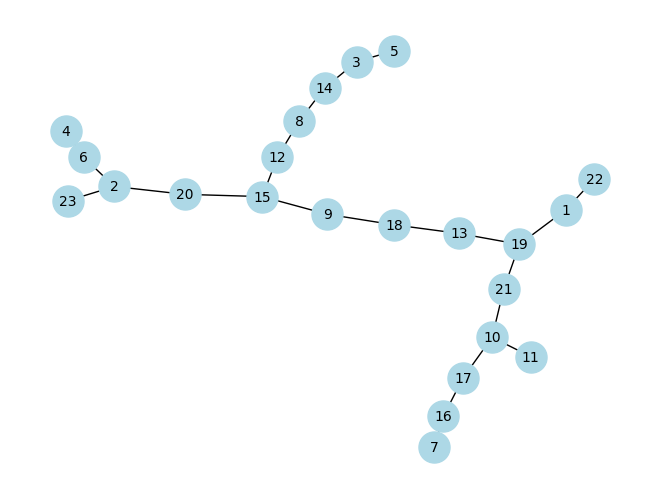

In [25]:
nx.draw(tree, with_labels=True, node_size=500, node_color="lightblue", font_size=10, font_color="black")

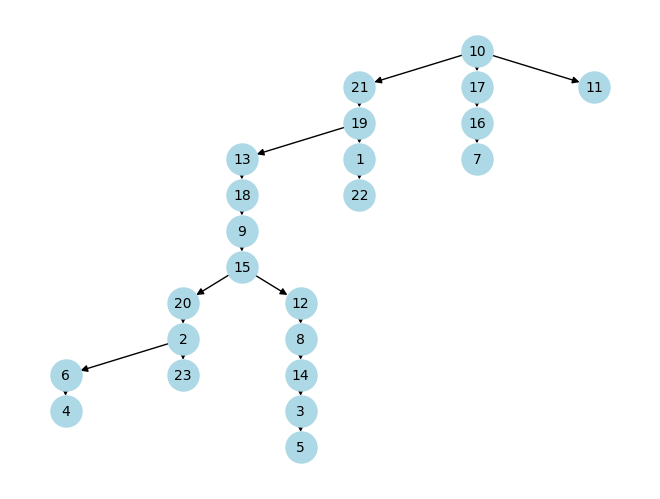

In [51]:
directed_tree = nx.bfs_tree(tree, source=root)
pos = graphviz_layout(directed_tree, prog="dot")
nx.draw(
    directed_tree,
    pos,
    with_labels=True,
    node_size=500,
    node_color="lightblue",
    font_size=10,
    font_color="black",
    arrows=True,
)

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
l = 18.807523809523808
r = 1
nr = l - r
nr / r

17.807523809523808

Text(0, 0.5, 'Count')

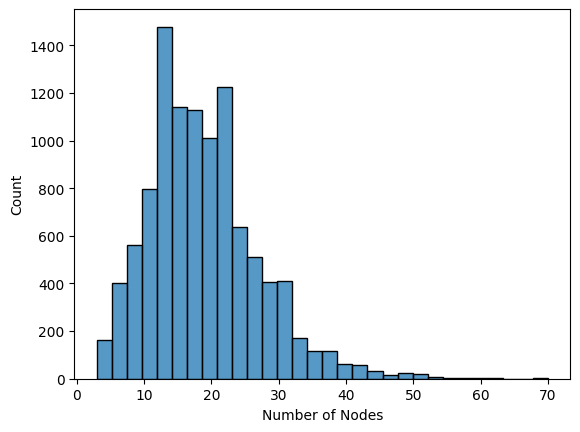

In [6]:
counts = sentences.groupby("n").size()
counts = counts.reset_index(name="count")
sns.histplot(data=counts, x="n", weights="count", bins=30)
plt.xlabel("Number of Nodes")
plt.ylabel("Count")

In [33]:
# Now we'll compute the expected accuracy of a random classifier
total = counts["count"].sum()
counts["probability"] = counts["count"] / total
expected_accuracy = (counts["probability"] / counts["n"]).sum()
expected_accuracy

np.float64(0.06584217211256642)

In [81]:
train_data = pd.read_csv("../data/cache/training_unwound.csv")
validation_data = pd.read_csv("../data/cache/validation_unwound.csv")

In [84]:
total_data = pd.concat([train_data, validation_data])
total_data

,row_index,node,is_root,language,tree_diameter,tree_size,tree_edges,number_of_centroids,average_degree,number_of_leaves,...,harmonic_centrality,betweenness_centrality,pagerank,katz_centrality,current_flow_closeness,current_flow_betweenness,load_centrality,percolation_centrality,second_order_centrality,laplacian_centrality
0,0,6,False,Japanese,14,23,22,1,1.913043,6,...,5.823846,0.090909,0.048565,0.209086,0.007246,9.090909e-02,0.090909,0.090909,98.762341,0.101449
1,0,4,False,Japanese,14,23,22,1,1.913043,6,...,4.561122,0.000000,0.027162,0.188298,0.006289,0.000000e+00,0.000000,0.000000,112.481110,0.043478
2,0,2,False,Japanese,14,23,22,1,1.913043,6,...,6.991703,0.255411,0.066901,0.228660,0.008403,2.554113e-01,0.255411,0.255411,84.451169,0.159420
3,0,23,False,Japanese,14,23,22,1,1.913043,6,...,5.157179,0.000000,0.025477,0.190256,0.007143,0.000000e+00,0.000000,0.000000,100.149888,0.057971
4,0,20,False,Japanese,14,23,22,1,1.913043,6,...,7.146825,0.311688,0.042552,0.213357,0.009615,3.116883e-01,0.311688,0.311688,71.147734,0.130435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39886,10479,10,False,Russian,8,16,15,1,1.875000,6,...,4.526190,0.000000,0.037900,0.225741,0.015873,4.229421e-18,0.000000,0.000000,65.787537,0.061224
39887,10479,2,False,Russian,8,16,15,1,1.875000,6,...,5.400000,0.000000,0.034903,0.230688,0.019608,0.000000e+00,0.000000,0.000000,52.839379,0.102041
39888,10479,16,False,Russian,8,16,15,1,1.875000,6,...,6.316667,0.247619,0.064754,0.255537,0.021277,2.476190e-01,0.247619,0.247619,47.749346,0.183673
39889,10479,5,False,Russian,8,16,15,1,1.875000,6,...,5.326190,0.133333,0.070237,0.248494,0.016949,1.333333e-01,0.133333,0.133333,61.773781,0.122449


In [89]:
is_root = total_data.groupby("is_root").size()
is_root

is_root
False    186979
True      10500
dtype: int64

In [90]:
is_root.index

Index([False, True], dtype='bool', name='is_root')

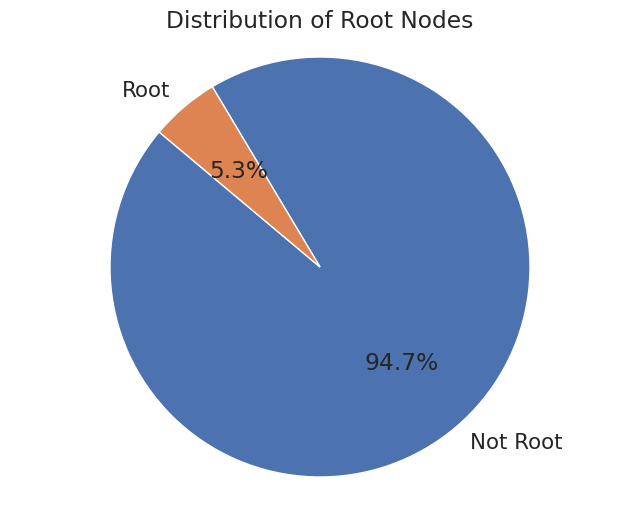

In [93]:
# Sns pie plot for is_root
plt.figure(figsize=(8, 6))
# increase font size
sns.set(font_scale=1.4)
plt.pie(is_root, labels=["Not Root", "Root"], autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Root Nodes")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<Axes: >

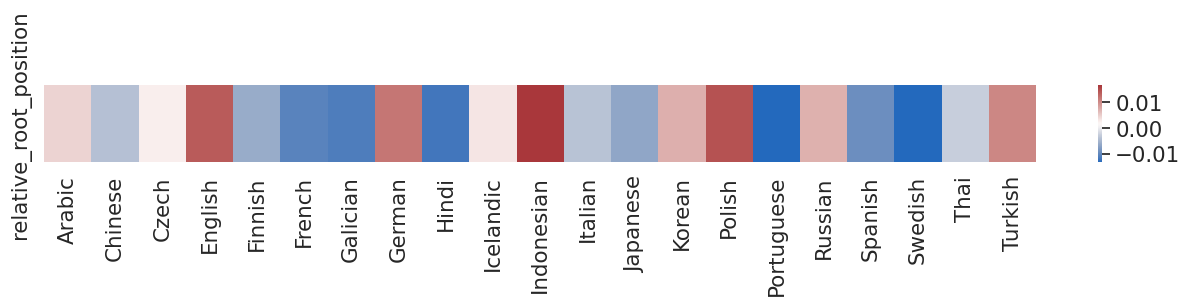

In [137]:
# Find correlation between node position and language
def one_hot_encode(df: pd.DataFrame) -> pd.DataFrame:
    """
    One-hot encode the 'language' column in the DataFrame.
    """
    return pd.get_dummies(df, columns=["language"], prefix="", prefix_sep="", drop_first=False)


sentences["relative_root_position"] = sentences["root"] / sentences["n"]
enc = one_hot_encode(sentences[["relative_root_position", "language"]])

corr = enc.corr()
corr = pd.DataFrame(corr.loc[["relative_root_position"]]).drop(columns=["relative_root_position"])
round(corr, 2)
plt.figure(figsize=(16, 1))
sns.set(font_scale=1.4)
sns.heatmap(corr, cmap="vlag")

<Axes: >

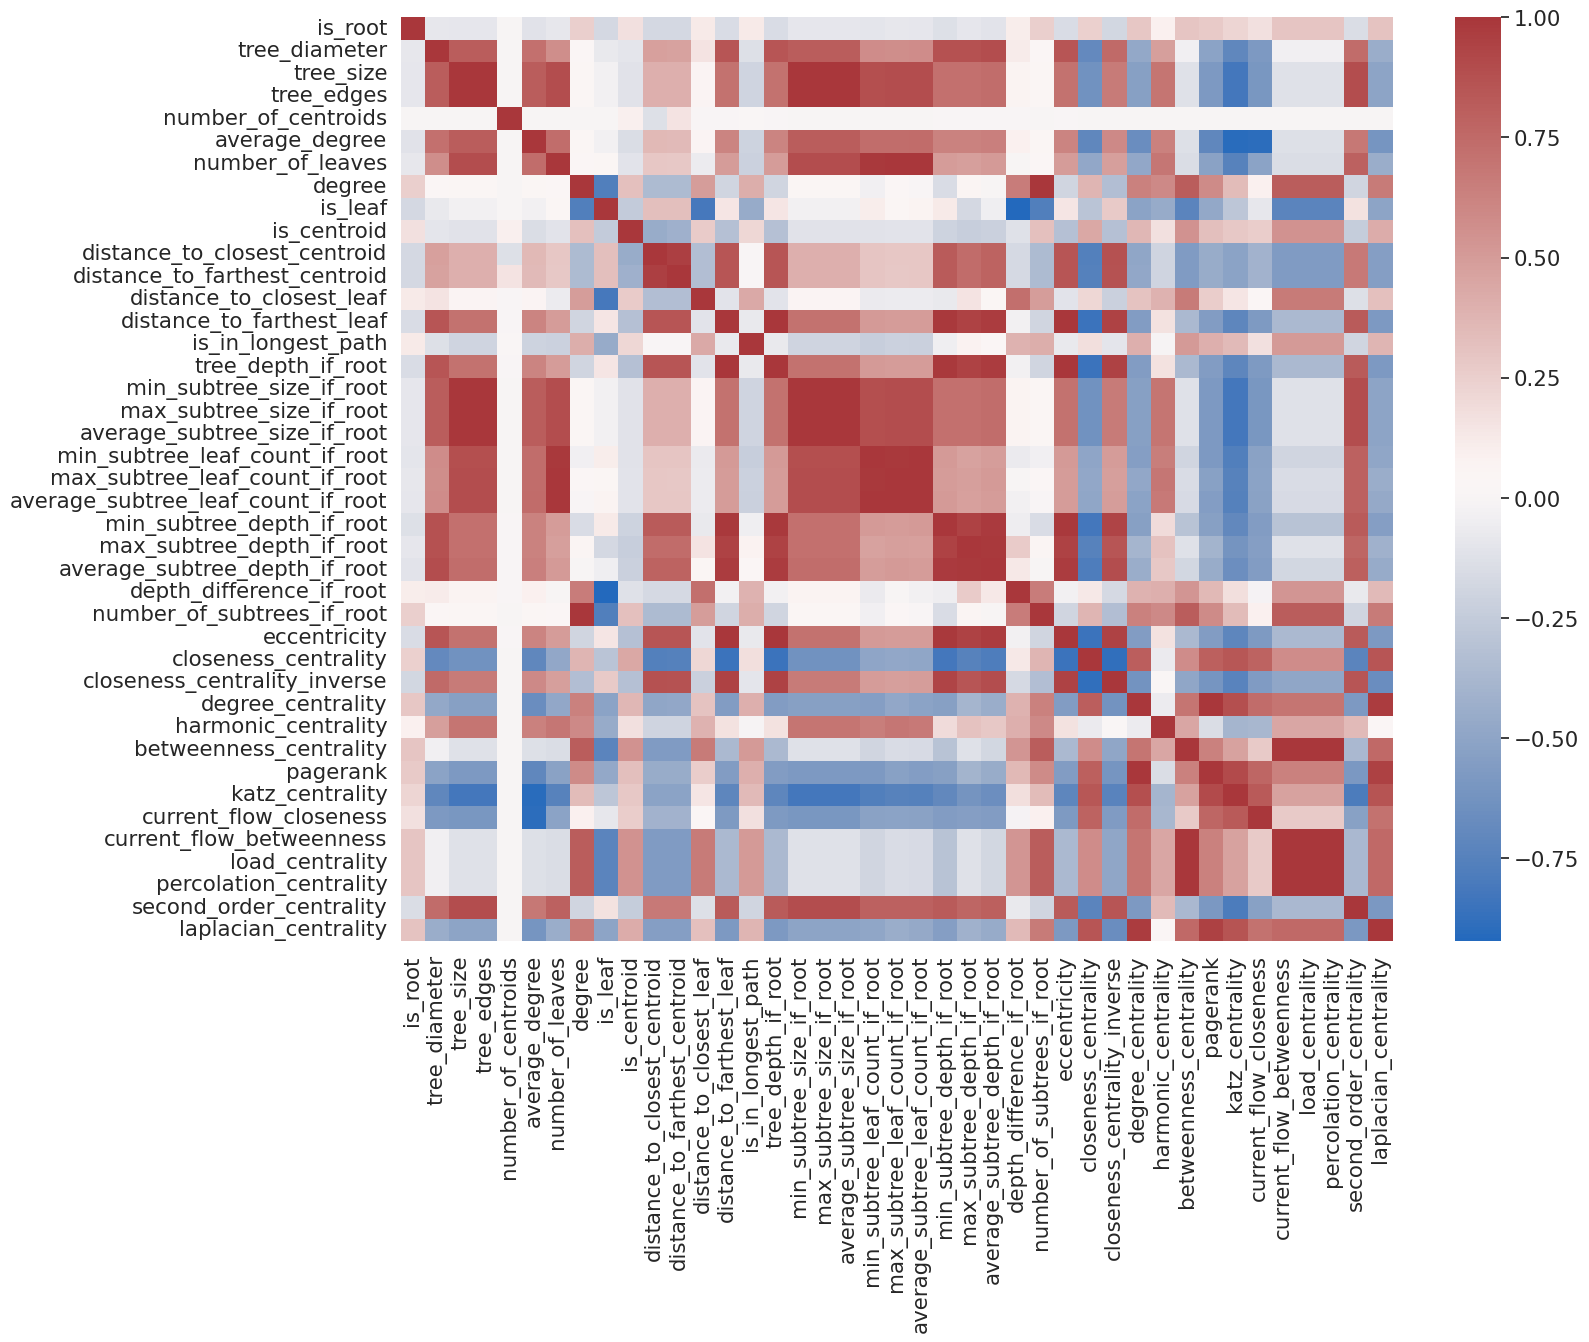

In [139]:
# To get the corr plot, drop the "row_index" and the "node" columns
def drop_columns_for_corr_plot(df: pd.DataFrame) -> pd.DataFrame:
    return df.drop(columns=["row_index", "node", "language"])


corr = drop_columns_for_corr_plot(total_data).corr()
round(corr, 2)
plt.figure(figsize=(16, 12))
sns.heatmap(corr, cmap="vlag")